In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [69]:
task2=pd.read_csv('customer_shopping_data.csv')
task2

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
task2.describe()

In [58]:
task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [59]:
task2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [60]:
task2.isnull()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False


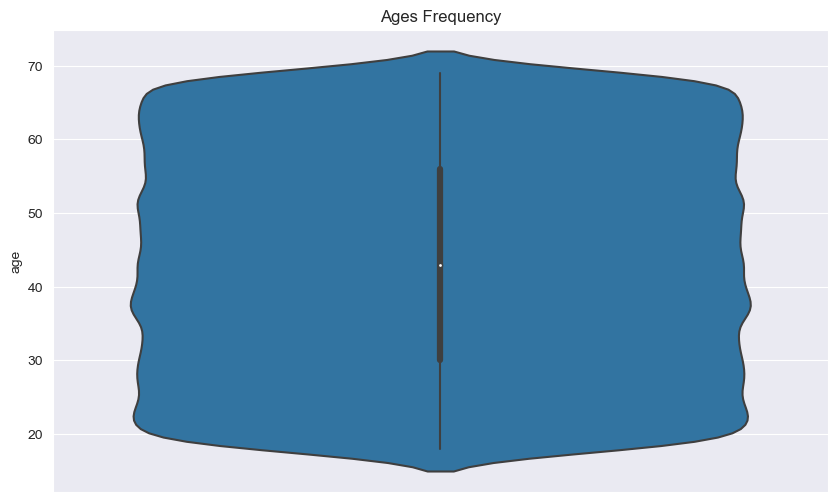

In [61]:
import seaborn as sns
task2.drop(["customer_id"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=task2["age"])
plt.show()

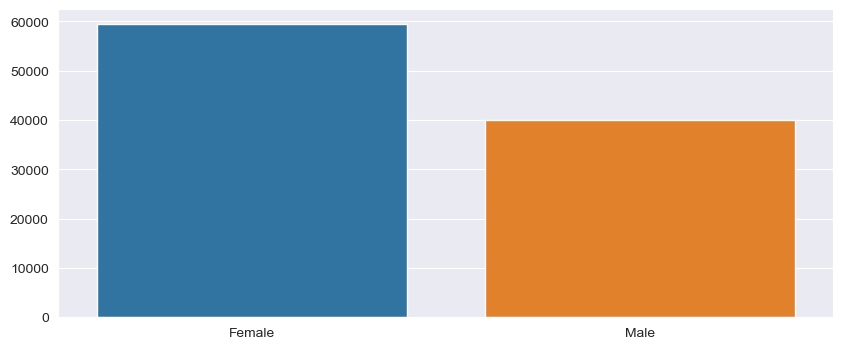

In [62]:
genders =task2.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

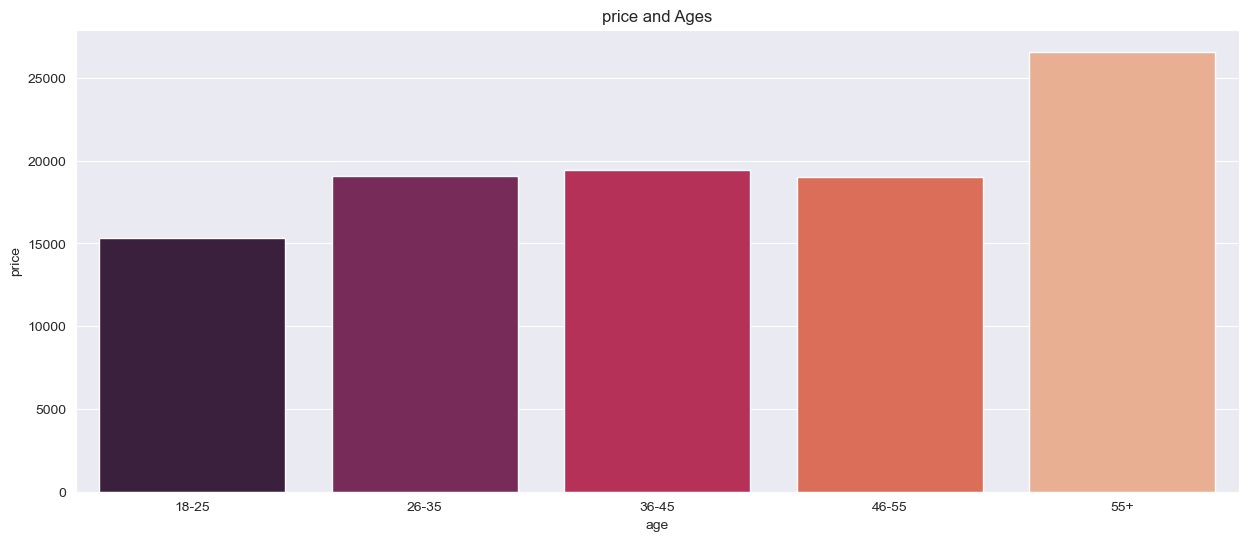

In [63]:
age18_25 = task2.age[(task2.age<= 25) & (task2.age>= 18)]
age26_35 =task2.age[(task2.age<= 35) & (task2.age>= 26)]
age36_45 = task2.age[(task2.age<= 45) & (task2.age >= 36)]
age46_55 = task2.age[(task2.age<= 55) & (task2.age>= 46)]
age55above =task2.age[task2.age>= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("price and Ages")
plt.xlabel("age")
plt.ylabel("price")
plt.show()

In [70]:
X, y = load_iris(return_X_y=True)

In [71]:
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

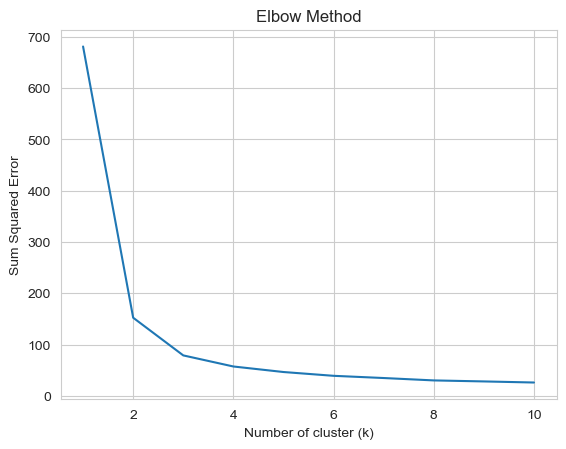

In [82]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

In [77]:

kmeans = KMeans(n_clusters =5, random_state = 4)
kmeans.fit(X)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=4)

In [78]:
kmeans.cluster_centers_


array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

In [79]:
pred = kmeans.fit_predict(X)
pred

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 0, 2, 4, 4, 2, 3, 2, 4, 2,
       4, 4, 4, 0, 4, 4, 4, 2, 2, 0, 4, 0, 2, 0, 4, 2, 0, 0, 4, 2, 2, 2,
       4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

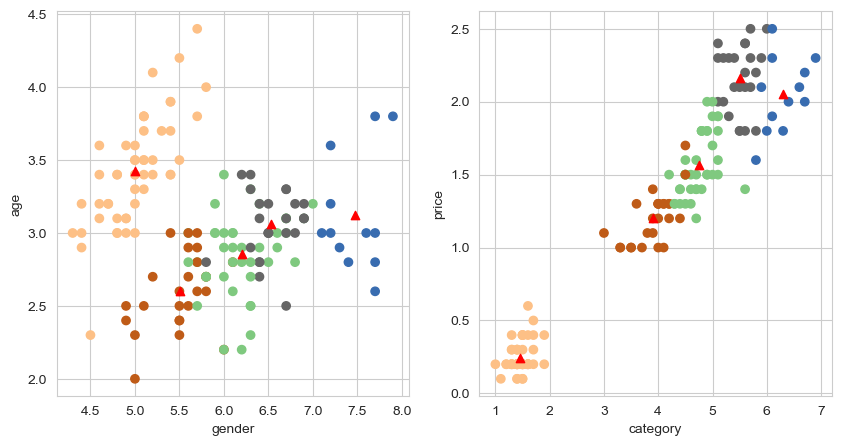

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("gender")
plt.ylabel("age")
     
plt.subplot(1,2,2)   
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("category")
plt.ylabel("price")
plt.show()